# 🔥 Fire Detection using Deep Learning

This project builds a **binary image classifier** to detect the presence of fire using deep learning techniques. It leverages **image data augmentation**, **class weighting**, and a **pretrained MobileNetV2** model to improve accuracy and generalization.

## 📑 Table of Contents
- 1. Data Preparation
- 2. Image Generator
- 3. Model Building
- 4. Training & Evaluation
- 5. Predictions & Visualization
- 6. Saving Model

---


##  1. Import Libraries 

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

##  2. Data Preparation 

In [39]:
data_path = r"C:\Users\MUHab\Downloads\archive (13)\Fire_Detection_Data"
img_size = (224, 224)
batch_size = 32

##  3. Image Generator 


In [41]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_ds = datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42
)

val_ds = datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    os.path.join(data_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 1057 images belonging to 2 classes.
Found 263 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


## 3. Class Weighting

In [43]:
labels = train_ds.classes  
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels.
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: 0.953971119133574, 1: 1.0506958250497018}


## 4. Bulid MobileNetV2 Model

In [45]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## 5. Train Model

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stop]
)

C:\Users\MUHab\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5378 - loss: 0.9159 - val_accuracy: 0.8289 - val_loss: 0.3872
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7652 - loss: 0.5130 - val_accuracy: 0.8593 - val_loss: 0.3207
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8179 - loss: 0.4287 - val_accuracy: 0.8973 - val_loss: 0.2609
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8393 - loss: 0.3281 - val_accuracy: 0.8859 - val_loss: 0.2611
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8781 - loss: 0.3003 - val_accuracy: 0.9163 - val_loss: 0.2361
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9019 - loss: 0.2525 - val_accuracy: 0.9278 - val_loss: 0.1956
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9217 - loss: 0.2227 - val_accuracy: 0.9163 - val_loss: 0.2088
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9084 - loss: 0.2179 - val_accuracy: 0.9354 - val_loss:

## 6. Evaluating

In [51]:
loss, acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")
print(f"\n✅ loss Data: {loss*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 731ms/step - accuracy: 0.9311 - loss: 0.1358

✅ Test Accuracy: 93.98%

✅ loss Data: 14.68%


In [53]:
y_true = test_ds.classes
y_pred = np.argmax(model.predict(test_ds), axis=1)
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.class_indices.keys()))

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 860ms/step

📊 Classification Report:
               precision    recall  f1-score   support

        Fire       0.96      0.92      0.94        87
     no-Fire       0.92      0.96      0.94        79

    accuracy                           0.94       166
   macro avg       0.94      0.94      0.94       166
weighted avg       0.94      0.94      0.94       166



In [55]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("\n🧩 Confusion Matrix:\n", conf_matrix)


🧩 Confusion Matrix:
 [[80  7]
 [ 3 76]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 759ms/step


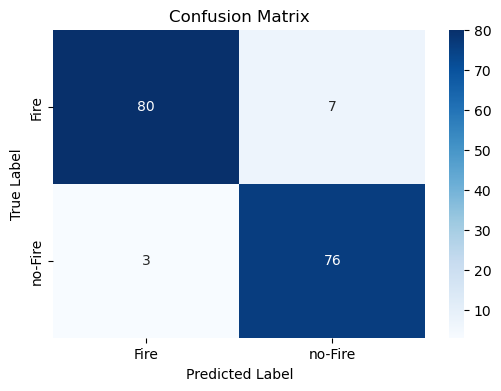

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_ds.classes

cm = confusion_matrix(y_true, y_pred)
labels = list(test_ds.class_indices.keys())  

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 7. Save Model

In [63]:
model.save("Improved_Fire_Detection.keras")

## 8. Scan With Live Camera

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pygame

model = load_model("Improved_Fire_Detection.keras")
labels = ['no-Fire', 'Fire']  

pygame.mixer.init()
pygame.mixer.music.load("fire-alarm-33770.mp3")

cap = cv2.VideoCapture(0)
img_size = (224, 224)
alarm_playing = False

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.resize(frame, img_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]
    class_index = int(prediction > 0.5)
    label = labels[class_index]
    confidence = prediction if class_index == 1 else 1 - prediction

    cv2.putText(frame, f"{label} ({confidence:.2f})", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1,
                (0, 0, 255) if label == "Fire" else (0, 255, 0), 2)

    if label == "Fire" and confidence > 0.8:
        if not alarm_playing:
            pygame.mixer.music.play(-1)  
            alarm_playing = True
    else:
        if alarm_playing:
            pygame.mixer.music.stop()
            alarm_playing = False

    cv2.imshow("Fire Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
pygame.mixer.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\MUHab\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━